In [1]:
%load_ext sage

In [3]:
from sage.misc.latex import latex
latex.add_package_to_preamble_if_available("tikz")
latex.add_to_mathjax_avoid_list("tikz")
sage.misc.latex.EMBEDDED_MODE = True

In [4]:
from IPython.display import display, Latex, HTML, Math, JSON

In [5]:
load('JinjaMagics.py')

In [205]:
# 以下のコメントを外すとJinjaMagicsが作成され、ロードされる
## %load JinjaMagics
from IPython import display
from IPython.core.magic import register_cell_magic, Magics, magics_class, cell_magic
import jinja2

@magics_class
class JinjaMagics(Magics):
    '''Magics class containing the jinja2 magic and state'''
    
    def __init__(self, shell):
        super(JinjaMagics, self).__init__(shell)
        
        # create a jinja2 environment to use for rendering
        # this can be modified for desired effects (ie: using different variable syntax)
        self.env = jinja2.Environment(loader=jinja2.FileSystemLoader('.'))
        
        # possible output types
        self.display_functions = dict(html=display.HTML, 
                                      latex=display.Latex,
                                      json=display.JSON,
                                      pretty=display.Pretty,
                                      display=display.display)

    
    @cell_magic
    def jinja(self, line, cell):
        '''
        jinja2 cell magic function.  Contents of cell are rendered by jinja2, and 
        the line can be used to specify output type.

        ie: "%%jinja html" will return the rendered cell wrapped in an HTML object.
        '''
        f = self.display_functions.get(line.lower().strip(), display.display)
        
        tmp = self.env.from_string(cell)
        rend = tmp.render(dict((k,v) for (k,v) in self.shell.user_ns.items() 
                                        if not k.startswith('_') and k not in self.shell.user_ns_hidden))
        
        return f(rend)
        
    
ip = get_ipython()
ip.register_magics(JinjaMagics)


In [6]:
names = ['alice','bob']

In [7]:
%%jinja html
<html>
<head>
<title>{{ title }}</title>
</head>
<body>
{% for name in names %}

Hello {{ name }} <br/>

{% endfor %} 
</body>
</html>

In [8]:
hdr=["円周率", "自然体数の底", "虚数単位", "無限大"]
sts=[pi, e, I, oo]


In [11]:
%%capture output
html.table([(h, str(st), "$%s$"%latex(st) ) for (h, st) in zip(hdr, sts)]) 

In [12]:
HTML(output.stdout)

UnicodeDecodeError: 'ascii' codec can't decode byte 0xe5 in position 96: ordinal not in range(128)

In [17]:
#import matplotlib.pyplot as plt
#from io import BytesIO
import urllib, base64
from IPython.display import Image

def _to_png(fig):
    filename = os.path.join(SAGE_TMP, 'junk.png')
    fig.save_image(filename)
    img = Image(filename)
    return "<img src='data:image/png;base64," +  base64.b64encode(img.data) + "'/>"

In [18]:
s_plt = plot(sin(x), [x, -pi, pi], figsize=4)
c_plt = plot(cos(x), [x, -pi, pi], figsize=4)

In [19]:
%%capture output
html.table([[_to_png(s_plt), _to_png(c_plt)]], header=["sin", "cos"])

sin,cos
,

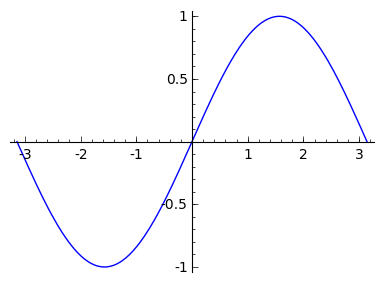
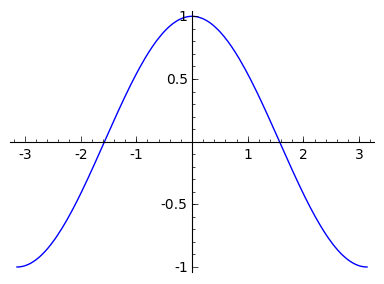

In [20]:
HTML(output.stdout)

In [21]:
import urllib, base64
from IPython.display import Image
class Graphics2Html:
    def __init__(self, graphics):
        filename = os.path.join(SAGE_TMP, 'junk.png')
        graphics.save_image(filename)
        _img = Image(filename)
        self._html = "<img src='data:image/png;base64," +  base64.b64encode(_img.data) + "'/>"
        os.remove(filename)
    
    def _repr_html_(self):
        return self._html

<__main__.Graphics2Html instance at 0x1135665f0>
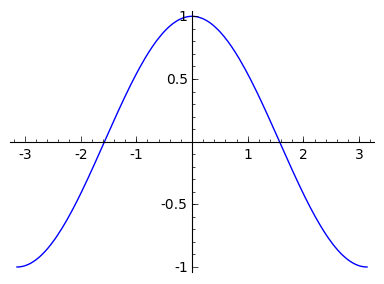

In [22]:
Graphics2Html(c_plt)

In [23]:
%%capture output
html.table([Graphics2Html(s_plt)._repr_html_(), Graphics2Html(c_plt)._repr_html_()])

,

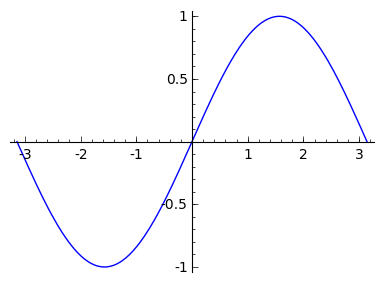
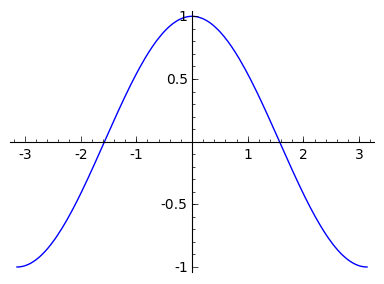

In [25]:
HTML(output.stdout)

In [94]:
print(s_plt)

Graphics object consisting of 1 graphics primitive


In [65]:
import IPython.display

In [67]:
s_plt.show()

Graphics object consisting of 1 graphics primitive


In [50]:
IPython.display.

<IPython.core.display.DisplayObject object>

In [48]:
s_plt.save_image?

In [38]:
HTML(str(output))

NameError: name 'output' is not defined

In [16]:
import pandas as pd
import numpy as np

np.__version__
# '1.10.1'

pd.__version__
# u'0.17.1'



u'0.17.1'

In [17]:
df = pd.DataFrame({'name': list('abcdefg'),
                   'values1': np.random.randn(7), 
                   'values2': np.random.randn(7)})
df

  name   values1   values2
0    a -0.281494 -1.037772
1    b -0.298142 -1.182853
2    c  0.484058 -0.619206
3    d  0.733423  0.031425
4    e  0.998706 -0.655828
5    f  0.563424  0.177234
6    g  0.292926  0.951065

In [18]:
type(df.style)
# pandas.core.style.Styler

df.style.background_gradient(cmap='winter')